# AQI Prediction - Exploratory Data Analysis (EDA)
## Sukkur Weather & Air Quality Analysis

This notebook provides comprehensive exploratory data analysis for the AQI prediction system:
- Data loading from MongoDB
- Statistical summaries
- Distribution analysis
- Time series trends
- Correlation analysis
- Feature engineering insights

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from config.db import get_db, close_client
import warnings
from datetime import datetime
import sys
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Data Loading from MongoDB

In [ ]:
# Connect to MongoDB Atlas and load data using persistent connection
db = get_db()

# Load from different collections
raw_weather = pd.DataFrame(list(db["raw_weather"].find({}, {"_id": 0})))
raw_aqi = pd.DataFrame(list(db["raw_aqi"].find({}, {"_id": 0})))
preprocessed_data = pd.DataFrame(list(db["preprocessed_data"].find({}, {"_id": 0})))
feature_store = pd.DataFrame(list(db["feature_store"].find({}, {"_id": 0})))

print(f"✅ Data Loaded:")
print(f"   - Raw Weather: {len(raw_weather)} records")
print(f"   - Raw AQI: {len(raw_aqi)} records")
print(f"   - Preprocessed: {len(preprocessed_data)} records")
print(f"   - Feature Store: {len(feature_store)} records")

✅ Data Loaded:
   - Raw Weather: 720 records
   - Raw AQI: 720 records
   - Preprocessed: 706 records
   - Feature Store: 706 records


## 2. Statistical Summary & Data Quality

In [3]:
# Choose dataset for EDA
if not preprocessed_data.empty:
    df = preprocessed_data.copy()
    df["timestamp"] = pd.to_datetime(df["timestamp"])
else:
    raw_weather["timestamp"] = pd.to_datetime(raw_weather["timestamp"])
    raw_aqi["timestamp"] = pd.to_datetime(raw_aqi["timestamp"])
    df = pd.merge(
        raw_weather,
        raw_aqi,
        on=["city", "timestamp"],
        how="inner",
        suffixes=("_weather", "_aqi")
    )

print(f"Dataset Shape: {df.shape}")
print("\nColumn Names:\n", df.columns.tolist())
df.head()

Dataset Shape: (706, 33)

Column Names:
 ['city', 'timestamp', 'clouds', 'fetched_at_weather', 'humidity', 'lat_weather', 'lon_weather', 'pressure', 'source_weather', 'temp', 'wind_speed', 'carbon_monoxide', 'european_aqi', 'fetched_at_aqi', 'lat_aqi', 'lon_aqi', 'nitrogen_dioxide', 'ozone', 'pm10', 'pm2_5', 'source_aqi', 'sulphur_dioxide', 'us_aqi', 'hour', 'day', 'month', 'day_of_week', 'is_weekend', 'is_rush_hour', 'temp_humidity_interaction', 'wind_pressure_interaction', 'pm2_5_rolling_3h', 'temp_rolling_3h']


,city,timestamp,clouds,fetched_at_weather,humidity,lat_weather,lon_weather,pressure,source_weather,temp,...,hour,day,month,day_of_week,is_weekend,is_rush_hour,temp_humidity_interaction,wind_pressure_interaction,pm2_5_rolling_3h,temp_rolling_3h
0,Sukkur,2025-12-25 00:00:00,0,2026-01-24 09:07:45.546,78,27.7058,68.8574,1015.5,open-meteo-archive,11.5,...,0,25,12,3,0,0,897.0,913.95,105.000000,11.500000
1,Sukkur,2025-12-25 01:00:00,0,2026-01-24 09:07:45.546,79,27.7058,68.8574,1015.7,open-meteo-archive,10.9,...,1,25,12,3,0,0,861.1,1218.84,100.700000,11.200000
2,Sukkur,2025-12-25 02:00:00,0,2026-01-24 09:07:45.546,81,27.7058,68.8574,1016.2,open-meteo-archive,10.8,...,2,25,12,3,0,0,874.8,812.96,98.266667,11.066667
3,Sukkur,2025-12-25 03:00:00,6,2026-01-24 09:07:45.546,83,27.7058,68.8574,1017.0,open-meteo-archive,11.5,...,3,25,12,3,0,0,954.5,610.20,95.000000,11.066667
4,Sukkur,2025-12-25 04:00:00,27,2026-01-24 09:07:45.546,78,27.7058,68.8574,1017.7,open-meteo-archive,14.3,...,4,25,12,3,0,0,1115.4,1323.01,90.100000,12.200000


In [4]:
# Statistical summary
df.describe()

,timestamp,clouds,fetched_at_weather,humidity,lat_weather,lon_weather,pressure,temp,wind_speed,carbon_monoxide,...,hour,day,month,day_of_week,is_weekend,is_rush_hour,temp_humidity_interaction,wind_pressure_interaction,pm2_5_rolling_3h,temp_rolling_3h
count,706,706.000000,706,706.000000,7.060000e+02,706.0000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,2026-01-08 17:44:21.756374272,19.015581,2026-01-24 09:07:45.547869696,70.488669,2.770580e+01,68.8574,1017.784561,14.740085,4.717989,970.640227,...,11.416431,15.596317,3.601983,3.035411,0.271955,0.245042,977.872663,4800.467932,82.597214,14.747356
min,2025-12-25 00:00:00,0.000000,2026-01-24 09:07:45.546000,26.000000,2.770580e+01,68.8574,1008.900000,6.200000,0.200000,234.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,305.500000,203.740000,14.200000,6.500000
25%,2026-01-01 09:15:00,0.000000,2026-01-24 09:07:45.547000064,56.000000,2.770580e+01,68.8574,1015.200000,11.600000,2.700000,644.250000,...,5.000000,8.000000,1.000000,1.000000,0.000000,0.000000,875.325000,2748.397500,51.033333,11.766667
50%,2026-01-08 17:30:00,0.000000,2026-01-24 09:07:45.548000,74.000000,2.770580e+01,68.8574,1017.350000,14.100000,4.800000,891.500000,...,11.000000,15.000000,1.000000,3.000000,0.000000,0.000000,996.400000,4892.880000,76.383333,14.116667
75%,2026-01-16 01:45:00,19.000000,2026-01-24 09:07:45.548000,85.000000,2.770580e+01,68.8574,1020.800000,18.000000,6.400000,1173.500000,...,17.000000,23.000000,1.000000,5.000000,1.000000,0.000000,1091.650000,6505.280000,103.575000,17.925000
max,2026-01-23 23:00:00,100.000000,2026-01-24 09:07:45.549000,100.000000,2.770580e+01,68.8574,1026.400000,24.400000,13.700000,2872.000000,...,23.000000,31.000000,12.000000,6.000000,1.000000,1.000000,1545.600000,13943.860000,188.266667,24.266667
std,NaN,34.269372,NaN,17.294545,3.555232e-15,0.0000,3.619024,4.320861,2.623511,445.422083,...,6.924473,9.006849,4.677873,1.959199,0.445282,0.430417,177.581249,2665.455793,40.025132,4.188662


In [5]:
# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({"Count": missing, "Percentage": missing_pct})
missing_df = missing_df[missing_df["Count"] > 0].sort_values(by="Count", ascending=False)

if not missing_df.empty:
    display(missing_df)
else:
    print("✅ No missing values!")

✅ No missing values!


## 3. Distribution Analysis

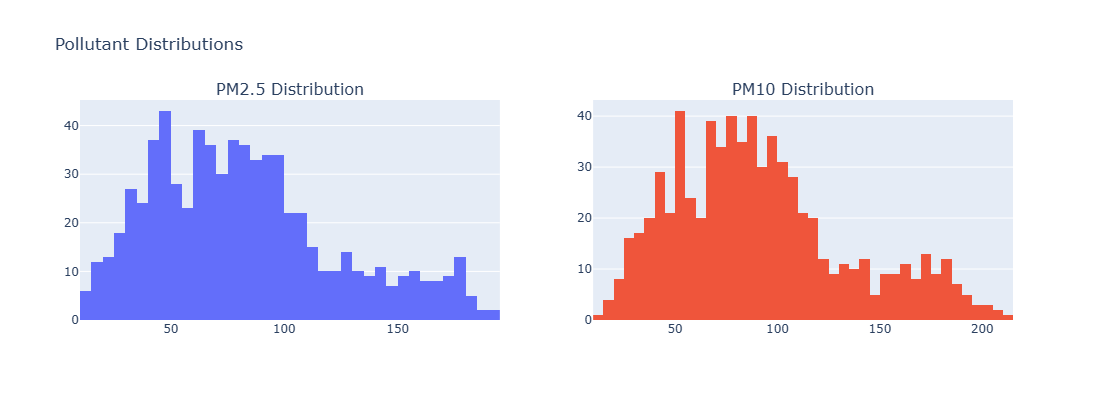

In [6]:
# PM2.5 and PM10 distributions
fig = make_subplots(rows=1, cols=2, subplot_titles=("PM2.5 Distribution", "PM10 Distribution"))

if "pm2_5" in df.columns:
    fig.add_trace(go.Histogram(x=df["pm2_5"], name="PM2.5", nbinsx=50), row=1, col=1)
if "pm10" in df.columns:
    fig.add_trace(go.Histogram(x=df["pm10"], name="PM10", nbinsx=50), row=1, col=2)

fig.update_layout(height=400, showlegend=False, title_text="Pollutant Distributions")
fig.show()

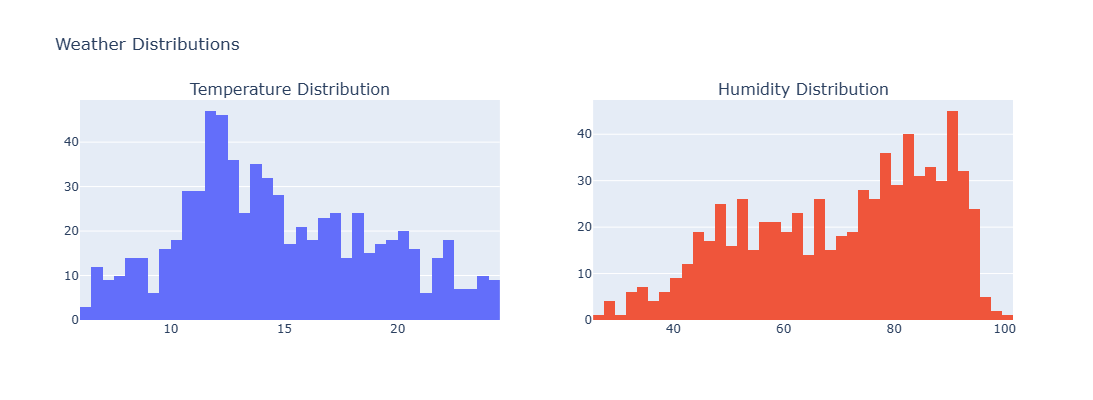

In [7]:
# Temperature and Humidity distributions
fig = make_subplots(rows=1, cols=2, subplot_titles=("Temperature Distribution", "Humidity Distribution"))

if "temp" in df.columns:
    fig.add_trace(go.Histogram(x=df["temp"], name="Temperature", nbinsx=50), row=1, col=1)
if "humidity" in df.columns:
    fig.add_trace(go.Histogram(x=df["humidity"], name="Humidity", nbinsx=50), row=1, col=2)

fig.update_layout(height=400, showlegend=False, title_text="Weather Distributions")
fig.show()

## 4. Time Series Analysis

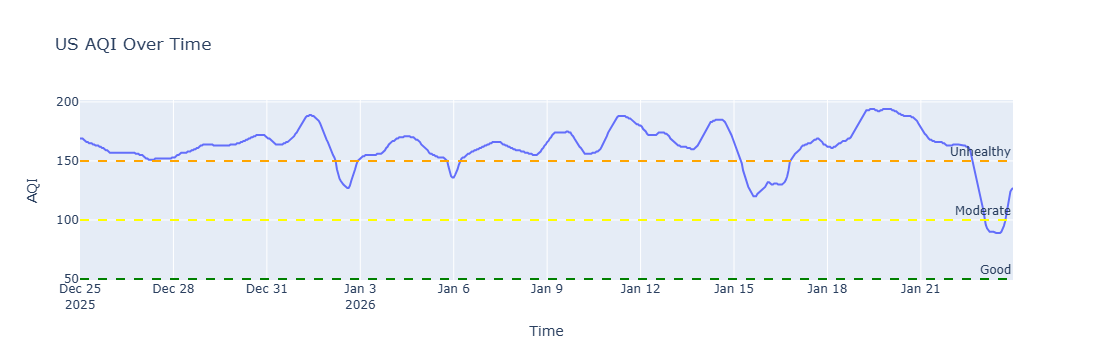

In [8]:
# AQI over time
if "us_aqi" in df.columns:
    fig = px.line(df.sort_values("timestamp"), x="timestamp", y="us_aqi",
                  title="US AQI Over Time", labels={"us_aqi": "AQI", "timestamp": "Time"})
    fig.add_hline(y=50, line_dash="dash", line_color="green", annotation_text="Good")
    fig.add_hline(y=100, line_dash="dash", line_color="yellow", annotation_text="Moderate")
    fig.add_hline(y=150, line_dash="dash", line_color="orange", annotation_text="Unhealthy")
    fig.show()

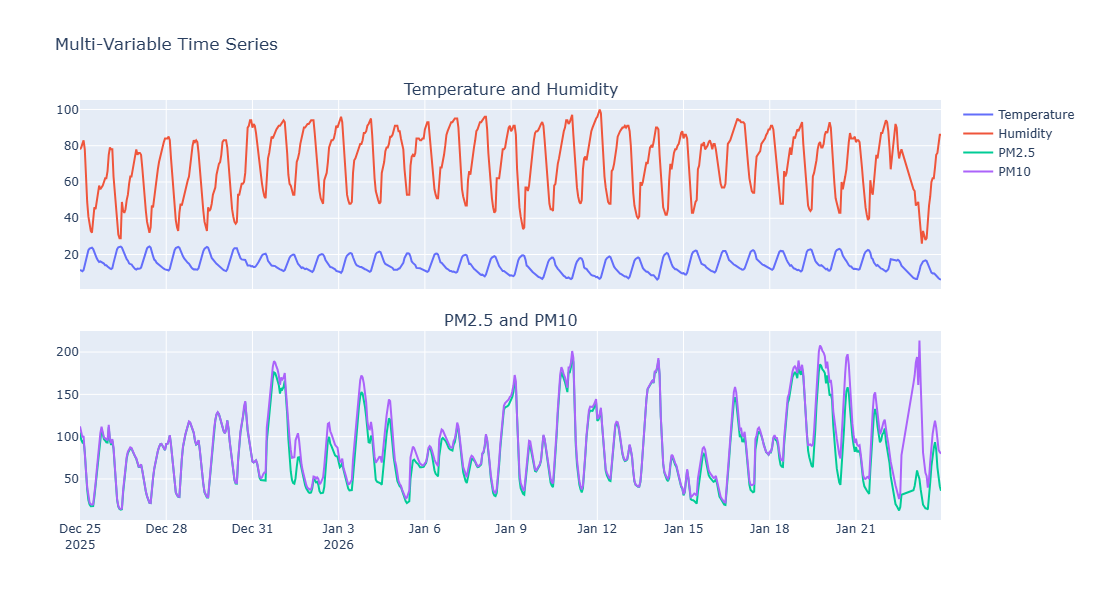

In [9]:
# Multi-variable time series
fig = make_subplots(rows=2, cols=1, subplot_titles=("Temperature and Humidity", "PM2.5 and PM10"),
                    shared_xaxes=True, vertical_spacing=0.1)

df_sorted = df.sort_values("timestamp")

if "temp" in df.columns:
    fig.add_trace(go.Scatter(x=df_sorted["timestamp"], y=df_sorted["temp"], name="Temperature"), row=1, col=1)
if "humidity" in df.columns:
    fig.add_trace(go.Scatter(x=df_sorted["timestamp"], y=df_sorted["humidity"], name="Humidity"), row=1, col=1)
if "pm2_5" in df.columns:
    fig.add_trace(go.Scatter(x=df_sorted["timestamp"], y=df_sorted["pm2_5"], name="PM2.5"), row=2, col=1)
if "pm10" in df.columns:
    fig.add_trace(go.Scatter(x=df_sorted["timestamp"], y=df_sorted["pm10"], name="PM10"), row=2, col=1)

fig.update_layout(height=600, title_text="Multi-Variable Time Series")
fig.show()

## 5. Correlation Analysis

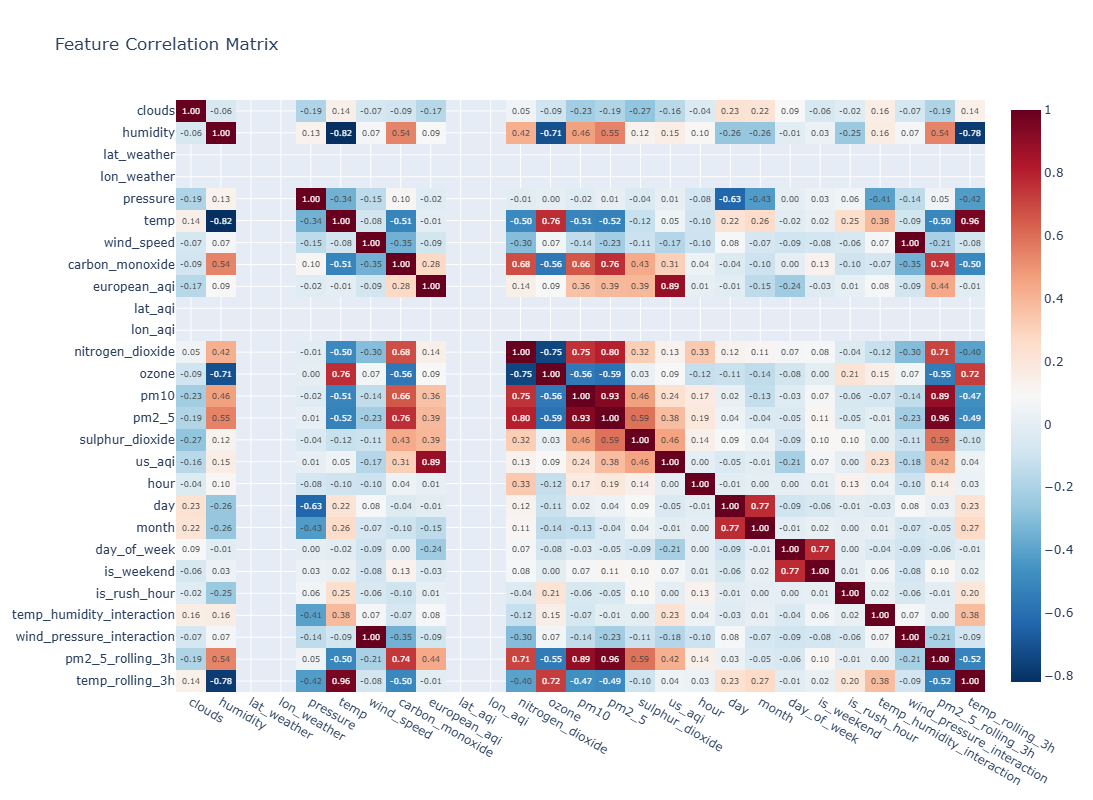

In [10]:
# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

fig = px.imshow(corr, text_auto=".2f", aspect="auto",
                title="Feature Correlation Matrix",
                color_continuous_scale="RdBu_r")
fig.update_layout(height=800, width=800)
fig.show()

In [11]:
# Correlation with AQI
if "us_aqi" in df.columns:
    aqi_corr = corr["us_aqi"].sort_values(ascending=False)
    display(aqi_corr)
else:
    print("us_aqi not in dataframe")

us_aqi                       1.000000
european_aqi                 0.885426
sulphur_dioxide              0.455721
pm2_5_rolling_3h             0.421037
pm2_5                        0.375579
carbon_monoxide              0.308100
pm10                         0.240028
temp_humidity_interaction    0.229150
humidity                     0.153743
nitrogen_dioxide             0.128712
ozone                        0.090607
is_weekend                   0.071160
temp                         0.049458
temp_rolling_3h              0.040159
pressure                     0.012456
is_rush_hour                 0.002940
hour                         0.000195
month                       -0.014128
day                         -0.047112
clouds                      -0.162306
wind_speed                  -0.174773
wind_pressure_interaction   -0.175049
day_of_week                 -0.208994
lat_weather                       NaN
lon_weather                       NaN
lat_aqi                           NaN
lon_aqi     

## 6. Feature Analysis

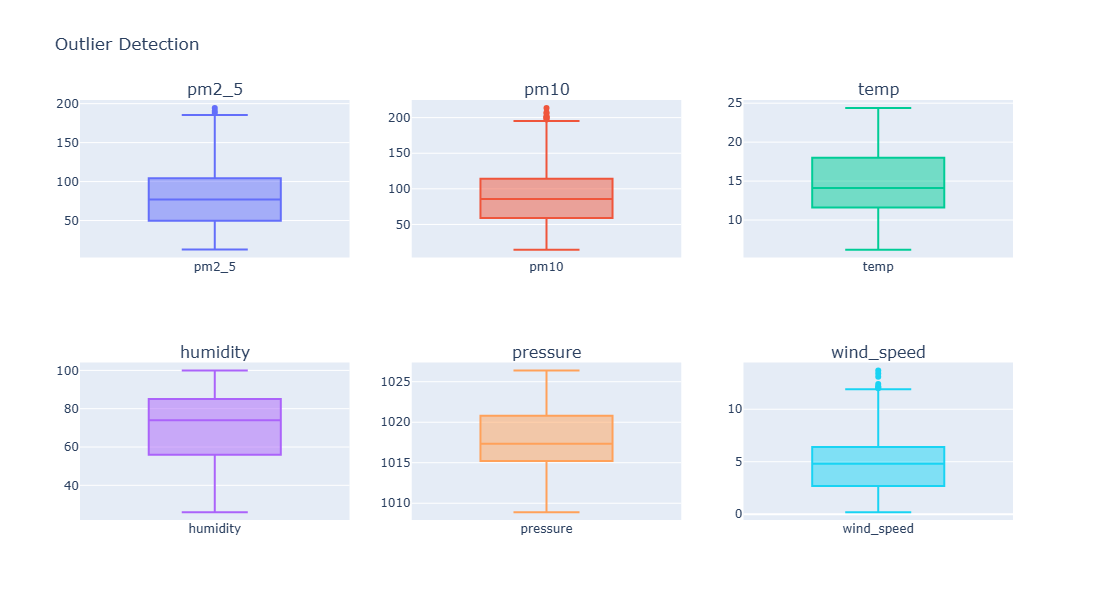

In [12]:
# Box plots for outlier detection
key_features = [col for col in ["pm2_5", "pm10", "temp", "humidity", "pressure", "wind_speed"] if col in df.columns]

if key_features:
    rows = 2
    cols = 3
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=key_features[:rows*cols])
    for i, col in enumerate(key_features[:rows*cols]):
        row = i // cols + 1
        col_idx = i % cols + 1
        fig.add_trace(go.Box(y=df[col], name=col), row=row, col=col_idx)
    fig.update_layout(height=600, showlegend=False, title_text="Outlier Detection")
    fig.show()
else:
    print("No key features found for box plots")

## 7. Insights & Summary

In [13]:
# Summary statistics
print("=" * 70)
print("EDA SUMMARY")
print("=" * 70)
print(f"Total Records: {len(df)}")
if "timestamp" in df.columns:
    print(f"Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Total Features: {len(df.columns)}")

if "us_aqi" in df.columns:
    print("\nAQI Statistics:")
    print(f"  - Mean: {df['us_aqi'].mean():.2f}")
    print(f"  - Median: {df['us_aqi'].median():.2f}")
    print(f"  - Std Dev: {df['us_aqi'].std():.2f}")
    print(f"  - Min: {df['us_aqi'].min():.2f}")
    print(f"  - Max: {df['us_aqi'].max():.2f}")

print("=" * 70)

EDA SUMMARY
Total Records: 706
Date Range: 2025-12-25 00:00:00 to 2026-01-23 23:00:00
Total Features: 33

AQI Statistics:
  - Mean: 161.86
  - Median: 163.00
  - Std Dev: 18.50
  - Min: 89.00
  - Max: 194.00
